# Yelp

This is an analysis of the Yelp public dataset.  This can be downloaded from the website:

http://www.yelp.com/dataset_challenge

I will start by doing some exploratory data anaysis

In [289]:
import numpy as np
import pandas as pd
import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.backends.backend_pdf

Start off by loading some data into a pandas dataframe

In [235]:
dfBusiness = pd.read_csv("./yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.csv")

In [236]:
dfBusiness.head()

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,categories,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,NaN,NaN,NaN,08:00,NaN,NaN,NaN,NaN,08:00,"['Doctors', 'Health & Medical']",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,['Nightlife'],...,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Active Life', 'Mini Golf', 'Golf']",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,10:00,NaN,NaN,NaN,NaN,10:00,"['Shopping', 'Home Services', 'Internet Servic...",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
4,False,NaN,False,10:00,NaN,NaN,NaN,NaN,10:00,"['Bars', 'American (New)', 'Nightlife', 'Loung...",...,no,casual,NaN,True,[],NaN,False,NaN,NaN,False


In [237]:
dfBusiness["city"].value_counts()

Las Vegas                              13601
Phoenix                                 8410
Charlotte                               4224
Scottsdale                              4039
Edinburgh                               3031
Pittsburgh                              2724
Mesa                                    2347
Tempe                                   2258
Henderson                               2130
Montréal                                1870
Chandler                                1867
Madison                                 1758
Montreal                                1384
Glendale                                1377
Gilbert                                 1263
Karlsruhe                                806
Peoria                                   688
North Las Vegas                          616
Surprise                                 448
Champaign                                398
Goodyear                                 354
Avondale                                 299
Matthews  

In [238]:
for att in dfBusiness.columns:
    print att

attributes.Ambience.divey
attributes.Dietary Restrictions.vegan
attributes.Happy Hour
hours.Thursday.open
attributes.Order at Counter
attributes.Hair Types Specialized In.africanamerican
attributes.Hair Types Specialized In.kids
attributes.BYOB
hours.Friday.open
categories
latitude
attributes.Outdoor Seating
attributes.Alcohol
attributes.Ambience.classy
attributes.Payment Types.mastercard
attributes.Parking.lot
business_id
attributes.Ambience.touristy
attributes.Corkage
hours.Tuesday.open
attributes.Good For.brunch
attributes.Payment Types.amex
name
hours.Monday.open
attributes.Waiter Service
attributes.Parking.street
attributes.Ambience.hipster
attributes.BYOB/Corkage
attributes.Hair Types Specialized In.straightperms
attributes.Music.live
attributes.Dietary Restrictions.dairy-free
attributes.Music.background_music
attributes.Good For.dinner
attributes.Good For.breakfast
attributes.Parking.garage
attributes.Music.karaoke
attributes.Good For Dancing
review_count
attributes.Hair Types S

In [239]:
dfBusinessEdinburgh = dfBusiness[dfBusiness['city'] == "Edinburgh"]
dfBusinessMontreal = dfBusiness[dfBusiness['city'] == "Montreal"]
dfBusinessWaterloo = dfBusiness[dfBusiness['city'] == "Waterloo"]
dfBusinessKarlsruhe = dfBusiness[dfBusiness['city'] == "Karlsruhe"]

dfBusinessLasVegas = dfBusiness[dfBusiness['city'] == "Las Vegas"]
dfBusinessMadison = dfBusiness[dfBusiness['city'] == "Madison"]
dfBusinessPhoenix = dfBusiness[dfBusiness['city'] == "Phoenix"]
dfBusinessPittsburgh = dfBusiness[dfBusiness['city'] == "Pittsburgh"]
dfBusinessCharlotte = dfBusiness[dfBusiness['city'] == "Charlotte"]
dfBusinessUrbana = dfBusiness[dfBusiness['city'] == "Urbana"]

In [240]:
dfBusinessForeign = [dfBusinessEdinburgh, dfBusinessKarlsruhe, dfBusinessMontreal, dfBusinessWaterloo]
dfBusinessUS = [dfBusinessLasVegas, dfBusinessMadison, dfBusinessPhoenix, dfBusinessPittsburgh, dfBusinessCharlotte, dfBusinessUrbana]
dfBusinessTotal = [dfBusinessLasVegas, dfBusinessMadison, dfBusinessPhoenix, dfBusinessPittsburgh, dfBusinessCharlotte, dfBusinessUrbana, dfBusinessEdinburgh, dfBusinessKarlsruhe, dfBusinessMontreal, dfBusinessWaterloo]
dfBusinessForeign = pd.concat(dfBusinessForeign)
dfBusinessUS = pd.concat(dfBusinessUS)
dfBusinessTotal = pd.concat(dfBusinessTotal)

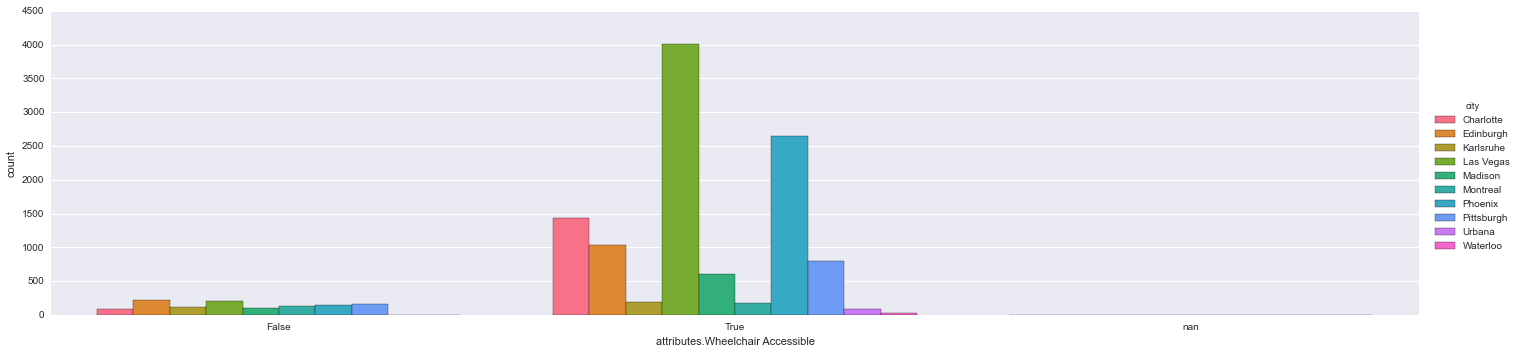

In [241]:
sns.factorplot("attributes.Wheelchair Accessible",data=dfBusinessTotal,hue="city",aspect=4)

In [242]:
dfBusinessTotal['attributes.Wheelchair Accessible'].value_counts()

True     11007
False     1147
dtype: int64

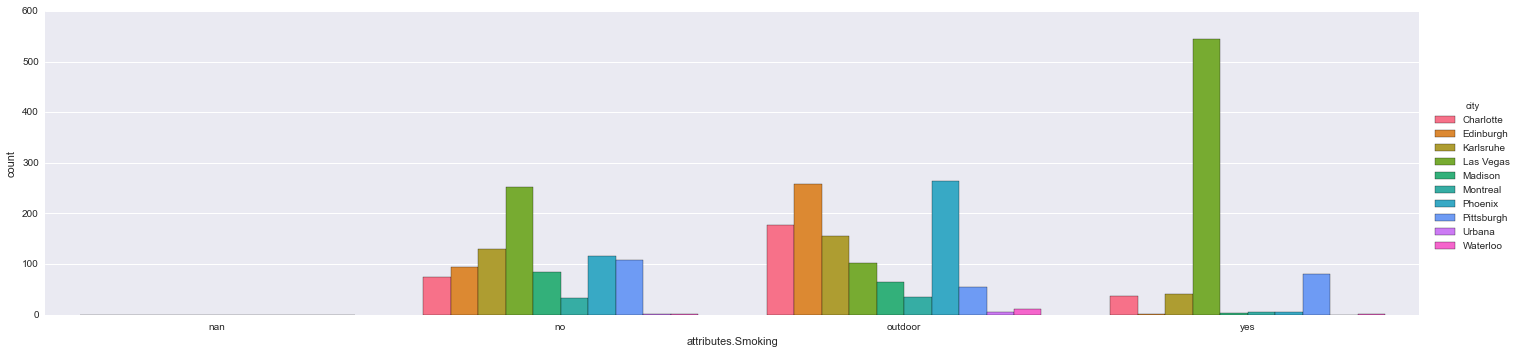

In [243]:
sns.factorplot("attributes.Smoking",data=dfBusinessTotal,hue="city",aspect=4)

In [244]:
dfBusinessTotal['attributes.Smoking'][dfBusinessTotal['city']=="Montreal"].value_counts()

outdoor    35
no         33
yes         6
dtype: int64

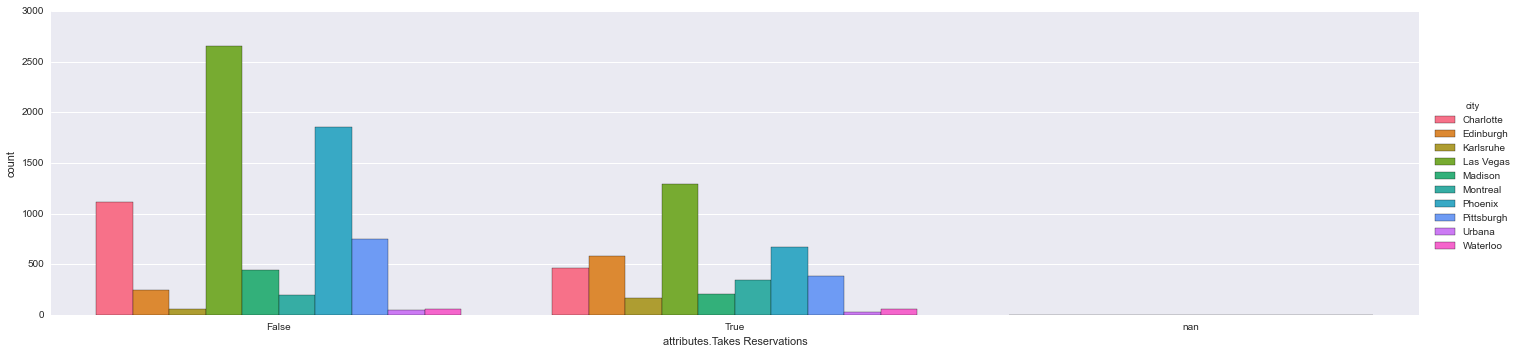

In [245]:
sns.factorplot("attributes.Takes Reservations",data=dfBusinessTotal,hue="city",aspect=4)

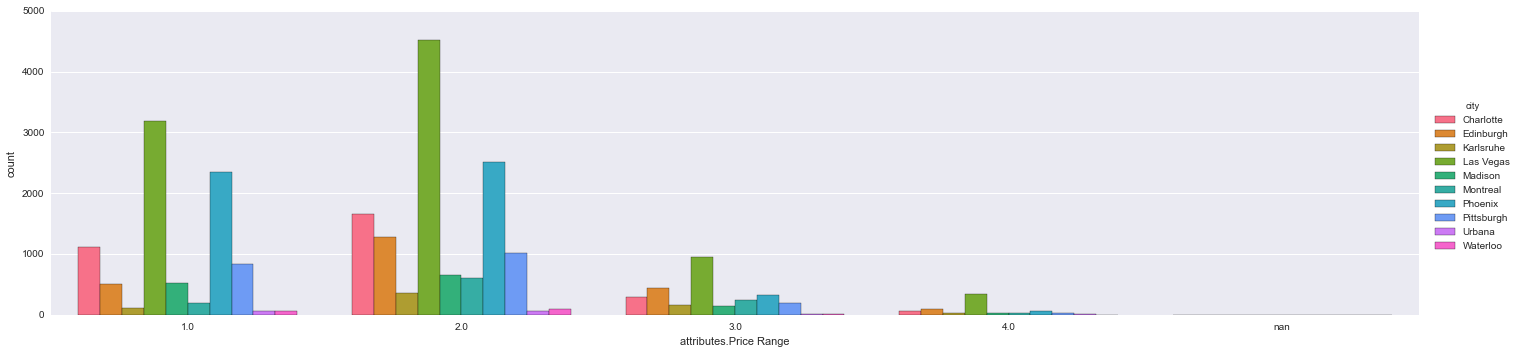

In [246]:
sns.factorplot("attributes.Price Range",data=dfBusinessTotal,hue="city",aspect=4)

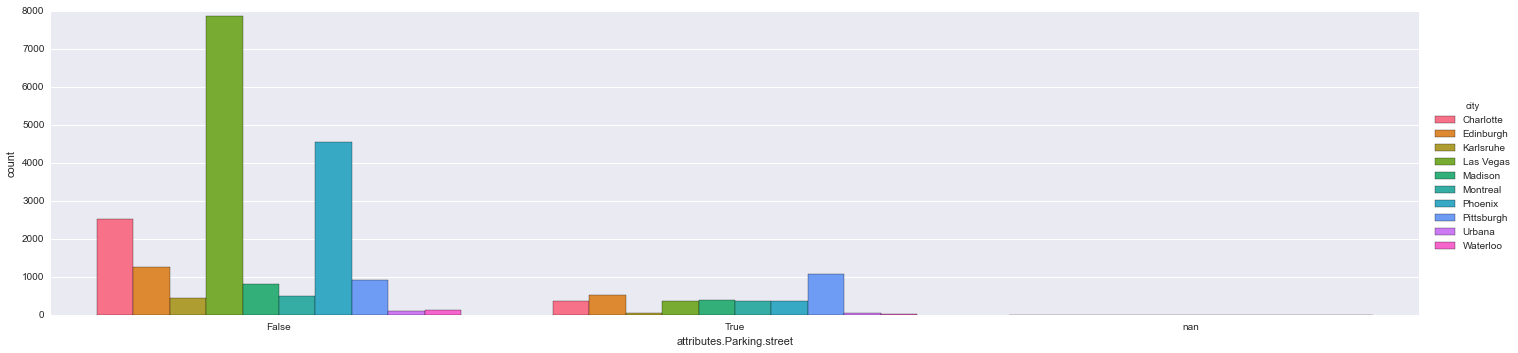

In [247]:
sns.factorplot("attributes.Parking.street",data=dfBusinessTotal,hue="city",aspect=4)

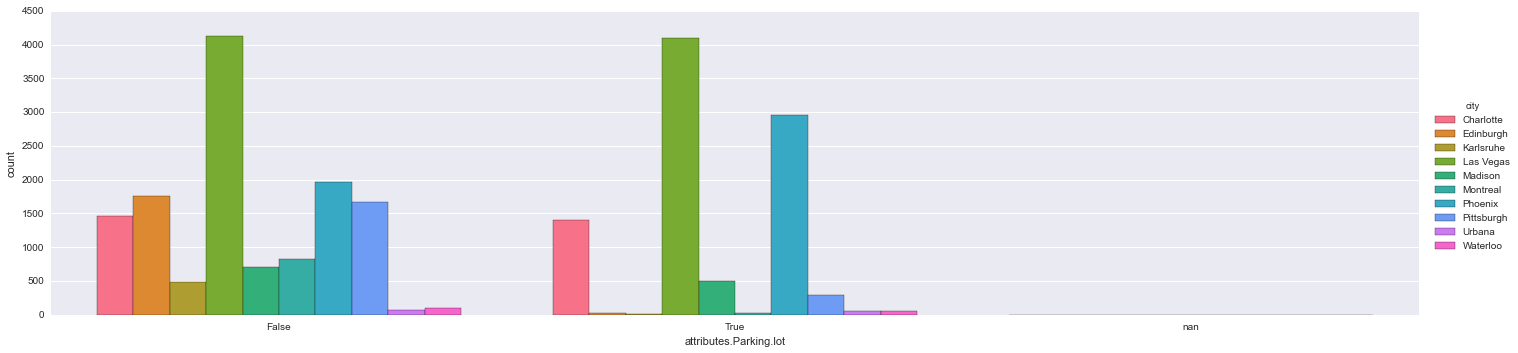

In [248]:
sns.factorplot("attributes.Parking.lot",data=dfBusinessTotal,hue="city",aspect=4)

In [249]:
dftips = pd.read_csv("./yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_tip.csv")

In [250]:
dftips.head()

,user_id,text,business_id,likes,date,type
0,-6rEfobYjMxpUWLNxszaxQ,Don't waste your time.,cE27W9VPgO88Qxe4ol6y_g,0,2013-04-18,tip
1,EZ0r9dKKtEGVx2CdnowPCw,Your GPS will not allow you to find this place...,mVHrayjG3uZ_RLHkLj-AMg,0,2013-01-06,tip
2,xb6zEQCw9I-Gl0g06e1KsQ,Great drink specials!,KayYbHCt-RkbGcPdGOThNg,0,2013-12-03,tip
3,fvTivrsJoUMYXnOJw9wZfw,Sarah rocks! Best waitress here! Be sure to ge...,wJr6kSA5dchdgOdwH6dZ2w,0,2013-07-22,tip
4,6GrH6gp09pqYykGv86D6Dg,Decent selection of more than just bar food. \...,fNGIbpazjTRdXgwRY_NIXA,0,2013-04-22,tip


In [251]:
#sns.factorplot("text",data=dftips,aspect=4)

In [252]:
dfcheckin = pd.read_csv("./yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.csv")

In [253]:
for att in dfcheckin.columns:
    print att

checkin_info.9-0
checkin_info.9-1
checkin_info.9-2
checkin_info.9-3
checkin_info.9-4
checkin_info.9-5
checkin_info.9-6
checkin_info.20-2
checkin_info.20-3
checkin_info.20-0
checkin_info.20-1
checkin_info.20-6
checkin_info.20-4
checkin_info.20-5
business_id
checkin_info.12-1
checkin_info.12-0
checkin_info.12-3
checkin_info.12-2
checkin_info.12-5
checkin_info.12-4
checkin_info.12-6
checkin_info.2-1
checkin_info.15-6
checkin_info.15-4
checkin_info.15-5
checkin_info.15-2
checkin_info.15-3
checkin_info.15-0
checkin_info.15-1
checkin_info.17-1
checkin_info.1-1
checkin_info.22-4
checkin_info.22-5
checkin_info.22-6
checkin_info.22-0
checkin_info.22-1
checkin_info.22-2
checkin_info.22-3
checkin_info.2-0
checkin_info.11-2
checkin_info.11-3
checkin_info.11-0
checkin_info.11-1
checkin_info.11-6
checkin_info.11-4
checkin_info.11-5
checkin_info.16-5
checkin_info.16-4
checkin_info.16-6
checkin_info.16-1
checkin_info.16-0
checkin_info.16-3
checkin_info.16-2
checkin_info.1-0
checkin_info.5-4
checkin_in

In [254]:
dfcheckin2 = dfcheckin.sort_index(by=['business_id'], ascending=[True])
dfBusinessTotal2= dfBusinessTotal.sort_index(by=['business_id'], ascending=[True])

In [255]:
dfcheckin2['business_id'].head()

38944    --1emggGHgoG6ipd_RMb-g
22399    --4Pe8BZ6gj57VFL5mUE8g
33354    --5jkZ3-nUPZxUvtcbr8Uw
31945    --BlvDO_RG2yElKu9XA1_g
29159    --Dl2rW_xO8GuYBomlg9zw
Name: business_id, dtype: object

In [256]:
dfBusinessTotal2['business_id'].head()

51697    --1emggGHgoG6ipd_RMb-g
29455    --4Pe8BZ6gj57VFL5mUE8g
583      --7PRjnsjMA6uhPK8mW13Q
38171    --Dl2rW_xO8GuYBomlg9zw
450      --UE_y6auTgq3FXlvUMkbw
Name: business_id, dtype: object

In [257]:
checkinbusiness = [dfcheckin2, dfBusinessTotal2]
dfNew = pd.concat(checkinbusiness)

In [258]:
for att in dfNew.columns:
    print att

attributes.Accepts Credit Cards
attributes.Accepts Insurance
attributes.Ages Allowed
attributes.Alcohol
attributes.Ambience.casual
attributes.Ambience.classy
attributes.Ambience.divey
attributes.Ambience.hipster
attributes.Ambience.intimate
attributes.Ambience.romantic
attributes.Ambience.touristy
attributes.Ambience.trendy
attributes.Ambience.upscale
attributes.Attire
attributes.BYOB
attributes.BYOB/Corkage
attributes.By Appointment Only
attributes.Caters
attributes.Coat Check
attributes.Corkage
attributes.Delivery
attributes.Dietary Restrictions.dairy-free
attributes.Dietary Restrictions.gluten-free
attributes.Dietary Restrictions.halal
attributes.Dietary Restrictions.kosher
attributes.Dietary Restrictions.soy-free
attributes.Dietary Restrictions.vegan
attributes.Dietary Restrictions.vegetarian
attributes.Dogs Allowed
attributes.Drive-Thru
attributes.Good For Dancing
attributes.Good For Groups
attributes.Good For Kids
attributes.Good For.breakfast
attributes.Good For.brunch
attribute

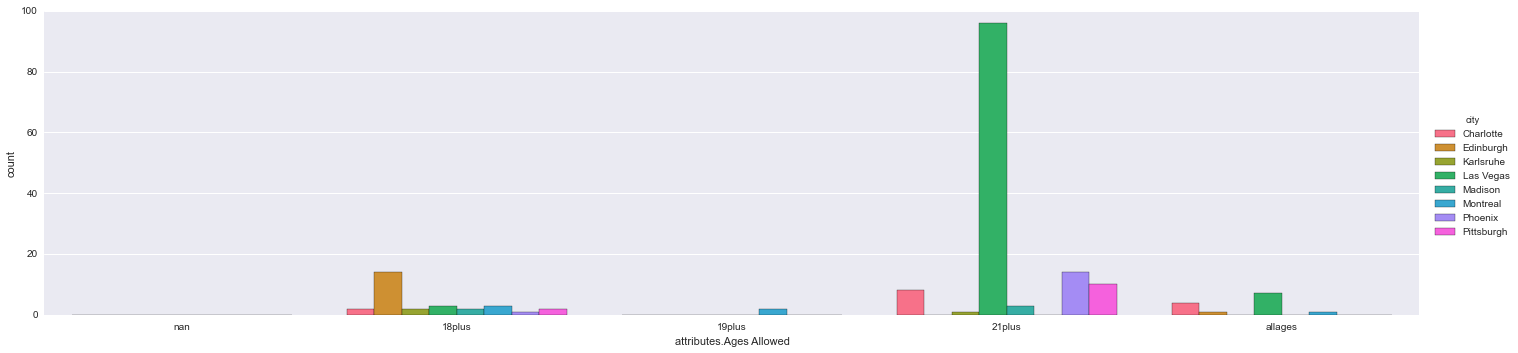

In [259]:
sns.factorplot("attributes.Ages Allowed", data=dfNew, hue="city", aspect=4)

In [260]:
dfReview = pd.read_csv("./yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.csv")

In [261]:
dfReview.columns

Index([u'user_id', u'review_id', u'text', u'votes.cool', u'business_id',
       u'votes.funny', u'stars', u'date', u'type', u'votes.useful'],
      dtype='object')

So, this looks like it has the information we need on the ratings of the restaurant.  What I want to be able to do is to create a dataframe which has the average rating for each restaurant.  I also want to know which city that each restaurant is located in.

In [262]:
dfTest.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2
10,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
11,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0
12,PP_xoMSYlGr2pb67BbqBdA,7N9j5YbBHBW6qguE5DAeyA,Wing sauce is like water. Pretty much a lot of...,0,UsFtqoBl7naz8AVUBZMjQQ,0,2,2014-10-29,review,0
13,JPPhyFE-UE453zA6K0TVgw,mjCJR33jvUNt41iJCxDU_g,Cold cheap beer. Good bar food. Good service. ...,1,UsFtqoBl7naz8AVUBZMjQQ,1,4,2014-11-28,review,1
14,fhNxoMwwTipzjO8A9LFe8Q,XsA6AojkWjOHA4FmuAb8XQ,Decent range somewhat close to the city. The ...,0,cE27W9VPgO88Qxe4ol6y_g,0,3,2012-08-19,review,1


In [263]:
print len(dfReview['business_id'])

1569264


In [264]:
for i in xrange(5):
    print dfReview['business_id'][i]

vcNAWiLM4dR7D2nwwJ7nCA
vcNAWiLM4dR7D2nwwJ7nCA
vcNAWiLM4dR7D2nwwJ7nCA
vcNAWiLM4dR7D2nwwJ7nCA
vcNAWiLM4dR7D2nwwJ7nCA


In [265]:
RestDic = {}

for i in xrange(len(dfReview['business_id'])):
    bid = dfReview['business_id'][i]
    stars = dfReview['stars'][i]
    if bid not in RestDic:
        RestDic[bid] = (stars,1)
    else:
        tupl = RestDic[bid]
        RestDic[bid] = (tupl[0]+stars,tupl[1]+1)

In [266]:
print len(RestDic)

60785


So, there are 60785 unique restaurants with reviews!.  Now I need to add a city to the dictionary.  For this, I will go back to my business dataframe.

In [267]:
print len(dfBusinessTotal['business_id'])

36351


In [268]:
dfBusinessTotal.reset_index(inplace=True)

In [269]:
for i in xrange(len(dfBusinessTotal['city'])):
    bid = dfBusinessTotal['business_id'][i]
    city = dfBusinessTotal['city'][i]
    if bid in RestDic:
        tupl = RestDic[bid]
        RestDic[bid] = (tupl[0],tupl[1],city)

In [270]:
print RestDic

{'OlpyplEJ_c_hFxyand_Wxw': (199, 59), '_qvxFHGbnbrAPeWBVifJEQ': (71, 18, 'Charlotte'), 'vuki3_Z5ryc8VmgUTkVF_g': (11, 3, 'Madison'), 's5yzZITWU_RcJzWOgjFecw': (299, 73, 'Las Vegas'), 'VZYMInkjRJVHwXVFqeoMWg': (13, 4, 'Phoenix'), 'j9J5X9qteM8GOlF5T94YnQ': (45, 13), 'FFdlPSZCGgTdg1CAfrlvlw': (108, 33, 'Phoenix'), 'kRHbVjZlajeRzGk_Lau_QA': (12, 3, 'Phoenix'), 'ZXkbbB2AtkGmEg-eZ0M3WQ': (11, 3, 'Charlotte'), 'z_LY6PK0Vv-iLQxrIGQIWw': (34, 9, 'Las Vegas'), '_xU5miVqAMe1EC_rgLV3Og': (19, 5), 'iVGkFUAyCfKVTEqU1xcqtw': (57, 12, 'Edinburgh'), 'Wbub8b6Ik9Dz-Fydg2LGdw': (14, 3), '7To7jF3FhnKPin4QaPVCiA': (19, 4, 'Edinburgh'), 'is7I7zd8Mi1m2Ow_EVw8FA': (15, 3), 'j13Aby6-9ZyklpG_W7qsew': (21, 5), '3m7khDnqH9QOg8gu3Ymumw': (17, 6, 'Phoenix'), '5TBOg9Rf47SECB8gTNGqeQ': (195, 57, 'Pittsburgh'), 'CS7rCi73OoxRw9JfUMKBwA': (15, 3, 'Edinburgh'), '9Kdb70PhV6O89cdfqYZJpQ': (23, 6, 'Pittsburgh'), '0_J4y0aEmtuzgdsH2OfWQw': (420, 100, 'Las Vegas'), 'W0eocyGliMbg8NScqERaiA': (310, 94), 'R1kKjAO5kZO6d0gQGqrvGA': 

In [271]:
keylist = []

for key in RestDic:
    if len(RestDic[key]) <3:
        keylist.append(key)

In [272]:
for val in keylist:
    del RestDic[val]

In [273]:
dfRatings = pd.DataFrame(RestDic)

In [274]:
dfRatings.head()

,--1emggGHgoG6ipd_RMb-g,--4Pe8BZ6gj57VFL5mUE8g,--7PRjnsjMA6uhPK8mW13Q,--Dl2rW_xO8GuYBomlg9zw,--UE_y6auTgq3FXlvUMkbw,--WLj8iK9DUKxkPnMHAoeA,--XBxRlD92RaV6TyUnP8Ow,--Y_2lDOtVDioX5bwF6GIw,--jFTZmywe7StuZ2hEjxyA,--m1g9P1wxNblrLANfVqlA,...,zzIP8b0fpMEacKp5KzuLrA,zzK7j06Pg8YWkQHzgsTuQA,zzUUj9BUNn0_0F5hwy7RRw,zze1eI588TqdJLs8xOzMxw,zzgXEteMduykqN8JAUG4CA,zzhSCOVTZ7MUKOAfwT-Bsw,zzhzW3DImwhSwpcK1Yuy7Q,zzrm5HEoYKEsfdi8XxSXuQ,zztd3r04hvMTZh3ol7VC4g,zzucnDH33KlmbkI4rLyQTA
0,15,14,13,30,296,10,15,74,15,17,...,8,56,22,7,25,14,53,2,16,60
1,4,5,4,7,90,3,4,26,4,4,...,3,13,7,2,8,3,14,2,4,16
2,Las Vegas,Phoenix,Pittsburgh,Las Vegas,Pittsburgh,Charlotte,Phoenix,Madison,Las Vegas,Edinburgh,...,Las Vegas,Pittsburgh,Edinburgh,Charlotte,Charlotte,Madison,Edinburgh,Las Vegas,Montreal,Phoenix


In [275]:
dfRatings = dfRatings.T

In [276]:
dfRatings = dfRatings.reset_index(level=0)

In [277]:
dfRatings.head()

,index,0,1,2
0,--1emggGHgoG6ipd_RMb-g,15,4,Las Vegas
1,--4Pe8BZ6gj57VFL5mUE8g,14,5,Phoenix
2,--7PRjnsjMA6uhPK8mW13Q,13,4,Pittsburgh
3,--Dl2rW_xO8GuYBomlg9zw,30,7,Las Vegas
4,--UE_y6auTgq3FXlvUMkbw,296,90,Pittsburgh


In [278]:
dfRatings.columns=["Restaurant_id","Stars","Reviews","City"]

In [279]:
dfRatings.head()

,Restaurant_id,Stars,Reviews,City
0,--1emggGHgoG6ipd_RMb-g,15,4,Las Vegas
1,--4Pe8BZ6gj57VFL5mUE8g,14,5,Phoenix
2,--7PRjnsjMA6uhPK8mW13Q,13,4,Pittsburgh
3,--Dl2rW_xO8GuYBomlg9zw,30,7,Las Vegas
4,--UE_y6auTgq3FXlvUMkbw,296,90,Pittsburgh


Now I want to create a new columns which has the average rating for each restaurant.

In [280]:
dfRatings["Rating"] = dfRatings.Stars/dfRatings.Reviews

In [281]:
dfRatings.head()

,Restaurant_id,Stars,Reviews,City,Rating
0,--1emggGHgoG6ipd_RMb-g,15,4,Las Vegas,3.75
1,--4Pe8BZ6gj57VFL5mUE8g,14,5,Phoenix,2.8
2,--7PRjnsjMA6uhPK8mW13Q,13,4,Pittsburgh,3.25
3,--Dl2rW_xO8GuYBomlg9zw,30,7,Las Vegas,4.285714
4,--UE_y6auTgq3FXlvUMkbw,296,90,Pittsburgh,3.288889


As there will be a lot of restaurants with unique values for their ratings, I want to group these into certain values.  For instance, a rating of 2.8 should fall in the 2.75 category and so on.  To do this, I need to use the apply() function, which I will use here.

def Rating(val):
    if val >0 and val < 0.5:
        return 0.25
    elif val >0.5 and val < 1.0:
        return 0.75
    elif val >1 and val < 1.5:
        return 1.25
    elif val >1.5 and val < 2.0:
        return 1.75
    elif val >2 and val < 2.5:
        return 2.25
    elif val >2.5 and val < 3.0:
        return 2.75
    elif val >3 and val < 3.5:
        return 3.25
    elif val >3.5 and val < 4.0:
        return 3.75
    elif val >4 and val < 4.5:
        return 4.25
    elif val >4.5 and val < 5.0:
        return 4.75
    else:
        return 0

In [282]:
dfRatings["Rating"] = dfRatings["Rating"].apply(Rating)

In [283]:
dfRatings.head()

,Restaurant_id,Stars,Reviews,City,Rating
0,--1emggGHgoG6ipd_RMb-g,15,4,Las Vegas,3.75
1,--4Pe8BZ6gj57VFL5mUE8g,14,5,Phoenix,2.75
2,--7PRjnsjMA6uhPK8mW13Q,13,4,Pittsburgh,3.25
3,--Dl2rW_xO8GuYBomlg9zw,30,7,Las Vegas,4.25
4,--UE_y6auTgq3FXlvUMkbw,296,90,Pittsburgh,3.25


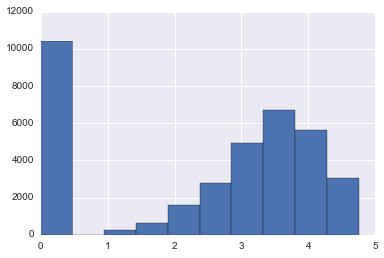

In [284]:
dfRatings["Rating"].hist()

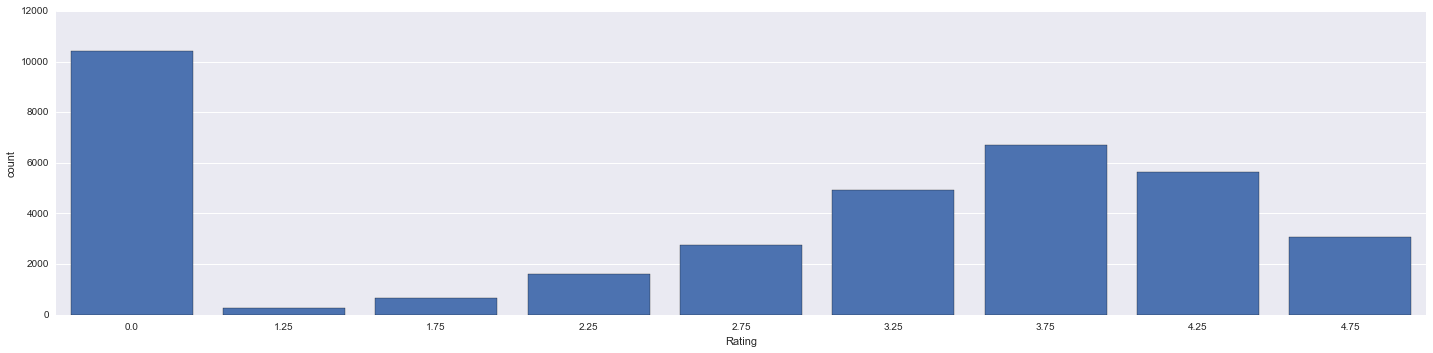

In [285]:
sns.factorplot("Rating", data=dfRatings, aspect=4)

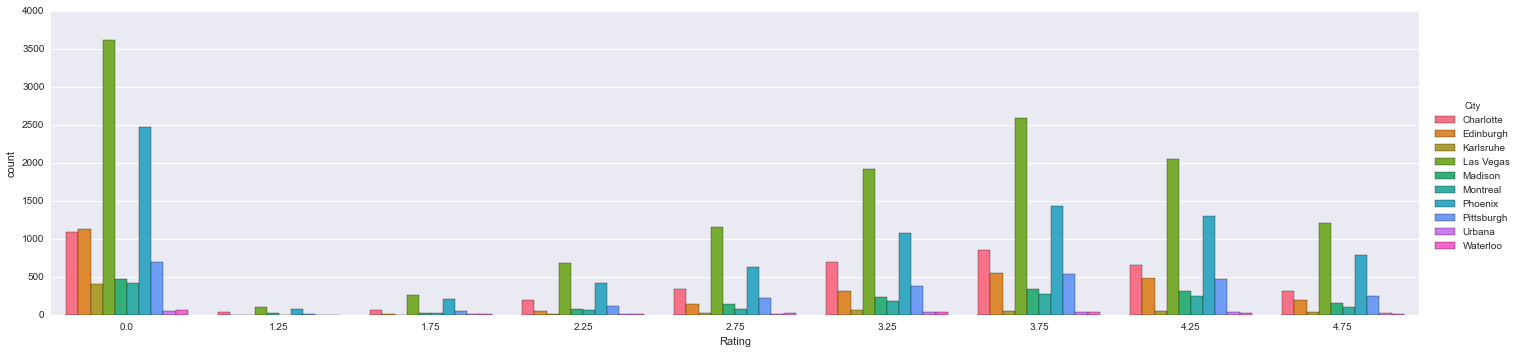

In [290]:
sns.factorplot("Rating", data=dfRatings, hue="City",aspect=4)

pp = matplotlib.backends.backend_pdf.PdfPages("YelpCities.pdf")
pp.savefig()
pp.close()

So, there are a lot of entries of 0, which is probably where there wasn't any ratings.  Other than that, as you'd expect, the mean appears to be around the 3.75 value.  Let's investigate this further.

In [287]:
print round(dfRatings["Rating"].mean(),3)

2.562


In [288]:
print "The mean rating for Charlotte is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Charlotte"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Charlotte"]["Rating"].std(),3))
print "The mean rating for Edinburgh is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Edinburgh"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Edinburgh"]["Rating"].std(),3))
print "The mean rating for Karlsruhe is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Karlsruhe"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Karlsruhe"]["Rating"].std(),3))
print "The mean rating for Las Vegas is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Las Vegas"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Las Vegas"]["Rating"].std(),3))
print "The mean rating for Madison is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Madison"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Madison"]["Rating"].std(),3))
print "The mean rating for Montreal is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Montreal"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Montreal"]["Rating"].std(),3))
print "The mean rating for Phoenix is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Phoenix"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Phoenix"]["Rating"].std(),3))
print "The mean rating for Pittsburgh is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Pittsburgh"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Pittsburgh"]["Rating"].std(),3))
print "The mean rating for Waterloo is %s +/- %s" % (round(dfRatings[dfRatings["City"] == "Waterloo"]["Rating"].mean(),3),round(dfRatings[dfRatings["City"] == "Waterloo"]["Rating"].std(),3))

The mean rating for Charlotte is 2.65 +/- 1.692
The mean rating for Edinburgh is 2.29 +/- 1.909
The mean rating for Karlsruhe is 1.377 +/- 1.844
The mean rating for Las Vegas is 2.626 +/- 1.723
The mean rating for Madison is 2.658 +/- 1.742
The mean rating for Montreal is 2.537 +/- 1.79
The mean rating for Phoenix is 2.537 +/- 1.778
The mean rating for Pittsburgh is 2.713 +/- 1.716
The mean rating for Waterloo is 2.379 +/- 1.717


So, the standard deviations are quite large, but this is probably due to the fact that there are a lot of 0 entries, so I need to address this.